In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Functional Vs Sequential API

## Sequential API

In [2]:
def build_model_with_sequential():
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

## Functional API

In [3]:
def build_model_with_functional():
    input_layer = tf.keras.Input(shape=(28, 28))
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    func_model = Model(inputs=input_layer, outputs=output_layer)
    return func_model

## Model Building

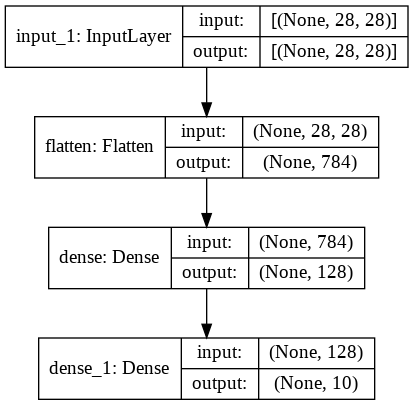

In [4]:
model = build_model_with_functional()
# model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True)

## Model Training

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [5]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6294 - accuracy: 0.7824
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8608
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3388 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3106 - accuracy: 0.8860
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8765


[0.3508971929550171, 0.8765000104904175]

# Multi Outputs Model

## Data Preparation

In [7]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [8]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

## Model Building

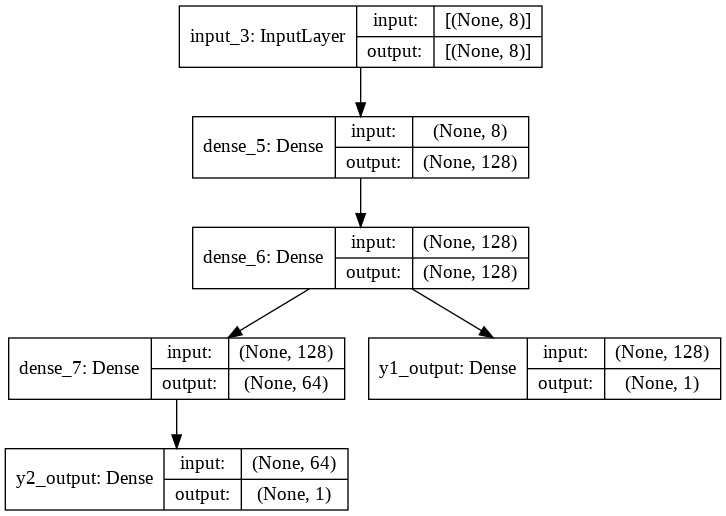

In [10]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True)

In [11]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

## Model Training

In [12]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y, epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 10ms/step - loss: 569.3117 - y1_output_loss: 277.2723 - y2_output_loss: 292.0393 - y1_output_root_mean_squared_error: 16.0364 - y2_output_root_mean_squared_error: 16.4025 - val_loss: 60.9143 - val_y1_output_loss: 16.0532 - val_y2_output_loss: 44.8611 - val_y1_output_root_mean_squared_error: 4.0066 - val_y2_output_root_mean_squared_error: 6.6978
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 38.4911 - y1_output_loss: 14.8110 - y2_output_loss: 23.6801 - y1_output_root_mean_squared_error: 3.8362 - y2_output_root_mean_squared_error: 4.8502 - val_loss: 20.3127 - val_y1_output_loss: 9.9221 - val_y2_output_loss: 10.3906 - val_y1_output_root_mean_squared_error: 3.1499 - val_y2_output_root_mean_squared_error: 3.2234
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 30.5542 - y1_output_loss: 11.1185 - y2_output_loss: 19.4356 - y1_output_root_mean_squared_error: 3.3255 - y2_output_root_mean_sq

## Evaluation

In [13]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 0.5906 - y1_output_loss: 0.2522 - y2_output_loss: 0.3384 - y1_output_root_mean_squared_error: 0.5022 - y2_output_root_mean_squared_error: 0.5817
Loss = 0.5905946493148804, Y1_loss = 0.25220516324043274, Y1_mse = 0.5022003054618835, Y2_loss = 0.33838945627212524, Y2_mse = 0.581712543964386


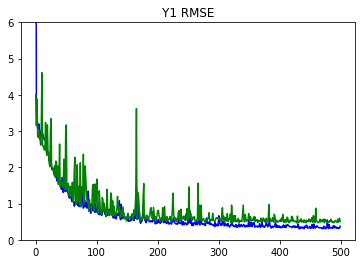

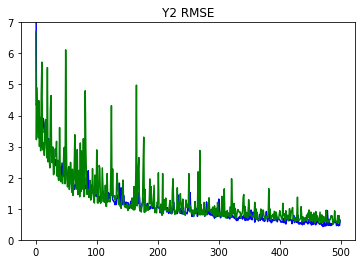

In [15]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
# plot_diff(test_Y[0], Y_pred[0], title='Y1')
# plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)